In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

1815.0


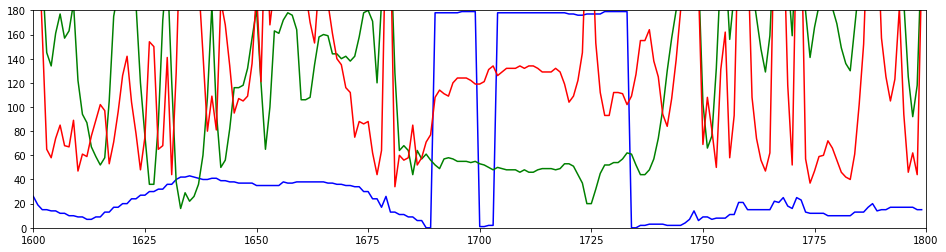

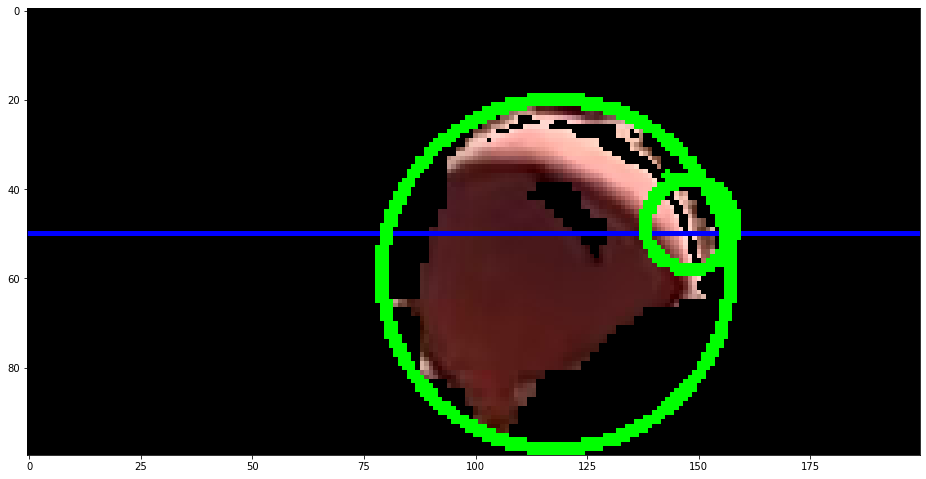

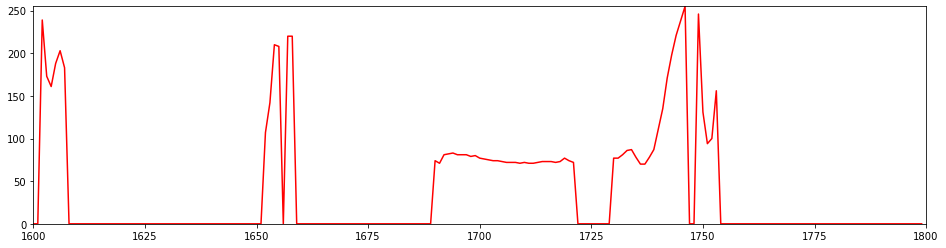

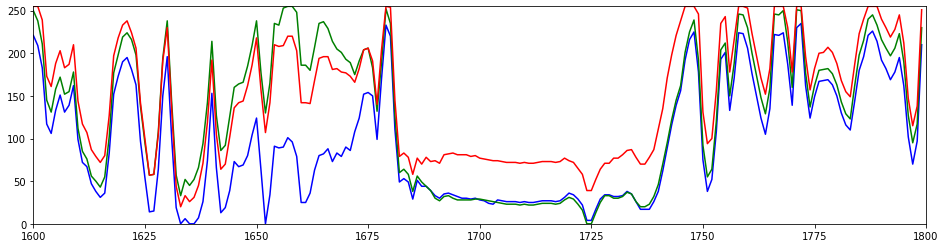

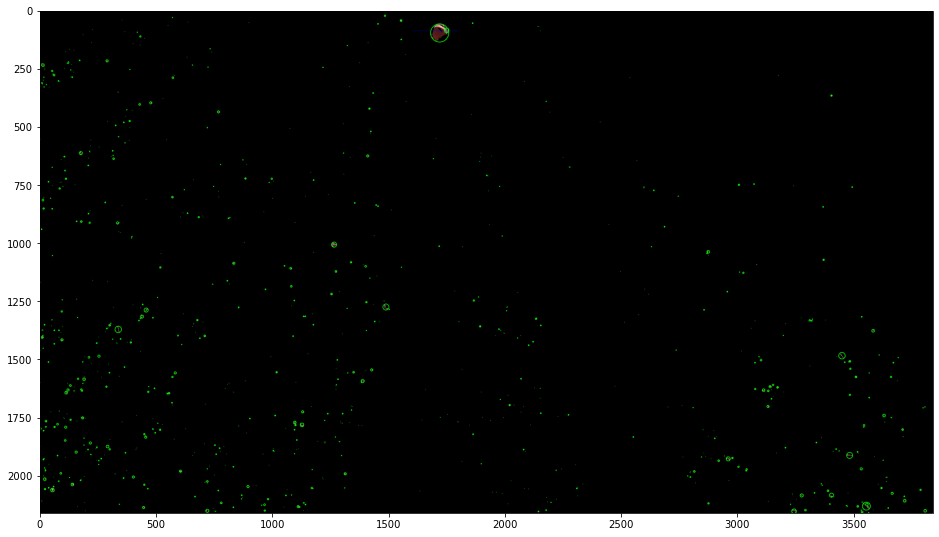

In [2]:
filepath = '.\\data\\DE-C5D-1-CALIB-FIELD 7-GX010085.MP4'

cap = cv2.VideoCapture(filepath)
while not cap.isOpened():
    cap = cv2.VideoCapture(filepath)
    cv2.waitKey(1000)
    print("Wait for the header")

pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

count = 0
empty = 0
#for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
line_row = 89

WAITCOUNTFREQ = 30
waitCount = 0
for i in range(1):
    ret, frame = cap.read()
    if ret == True:
        count += 1
        if waitCount == 0:
            BGR = frame.copy()
            HLS = cv2.cvtColor(BGR, cv2.COLOR_BGR2HLS)
            strip = HLS[line_row,1600:1800,:]
            plt.figure(figsize=(16,4))
            plt.plot(np.arange(1600,1800),strip[:,0],color='blue', label='Hue')
            plt.plot(np.arange(1600,1800),strip[:,1],color='green', label='Light')
            plt.plot(np.arange(1600,1800),strip[:,2],color='red', label='Saturation')
            plt.axis([1600, 1800, 0, 180])
            plt.show()
            posRedHueMask = (HLS[:,:,0]<10).astype('uint8')
            negRedHueMask = (HLS[:,:,0]>170).astype('uint8')
            redHueMask = np.bitwise_or(posRedHueMask,negRedHueMask).astype('uint8')
            rows = np.shape(frame)[0]
            cols = np.shape(frame)[1]
            b = frame[:,:,0]
            g = frame[:,:,1]
            r = frame[:,:,2]

            #2R-G-B
            ExR = 2*r.astype('int') - g.astype('int') - b.astype('int')
            #ExR = 1.4*r.astype('int') - b.astype('int')
            ExR_mask = ExR>80
            ExR_cutoff = np.multiply(r,ExR_mask)
            red_img = np.zeros([rows,cols,3],dtype='uint8')
            
            redHueExR_mask = np.bitwise_and(redHueMask,ExR_mask)
            redHueExR_cutoff = np.multiply(ExR,redHueExR_mask)

            for c in range(3):
                red_img[:,:,c] = np.multiply(frame[:,:,c],redHueExR_mask).astype('uint8')
            
            cv2.line(red_img,(1600,line_row),(1800,line_row),(255,0,0),1)
            contours,hierarchy = cv2.findContours(redHueExR_mask.astype('uint8')*255, cv2.RETR_EXTERNAL, 2)
            for cnt in contours:
                (x,y),radius = cv2.minEnclosingCircle(cnt)
                center = (int(x),int(y))
                radius = int(radius)
                cv2.circle(red_img,center,radius,(0,255,0),2)
            
            plt.figure(figsize=(16,16))
            plt.imshow(cv2.cvtColor(red_img[line_row-50:line_row+50,1600:1800,:],cv2.COLOR_BGR2RGB))
            plt.show()
            
            plt.figure(figsize=(16,4))
            plt.plot(np.arange(1600,1800),ExR_cutoff[line_row,1600:1800],color='red', label='ExR')
            plt.axis([1600, 1800, 0, 255])
            plt.show()
            
            plt.figure(figsize=(16,4))
            strip = BGR[line_row,1600:1800,:]
            plt.plot(np.arange(1600,1800),strip[:,0],color='blue', label='Blue')
            plt.plot(np.arange(1600,1800),strip[:,1],color='green', label='Green')
            plt.plot(np.arange(1600,1800),strip[:,2],color='red', label='Red')
            plt.axis([1600, 1800, 0, 255])
            plt.show()
            
            plt.figure(figsize=(16,16))
            plt.imshow(cv2.cvtColor(red_img,cv2.COLOR_BGR2RGB))
            plt.show()
            
            waitCount = WAITCOUNTFREQ
        else:
            waitCount -= 1
    else:
        empty += 1